In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from scipy.spatial.distance import cosine, squareform
from scipy.cluster import hierarchy

In [40]:
def read_data(data_path):
    pmat = pd.read_csv(data_path, sep=' ', header=None)
    #pmat.set_index('Position', inplace=True)
    return pmat

In [41]:
def analyze_data(pmat):
    # Calculate cosine distance matrix
    distance_matrix = np.zeros((pmat.shape[1], pmat.shape[1]))
    for i in range(pmat.shape[1]):
        for j in range(i + 1, pmat.shape[1]):
            d_ij = cosine(pmat.iloc[:, i], pmat.iloc[:, j])
            distance_matrix[i, j] = d_ij
            distance_matrix[j, i] = d_ij

    # Convert the distance matrix to a condensed distance vector
    condensed_distance_vector = squareform(distance_matrix)

    # Perform neighbor joining
    linkage_matrix = hierarchy.linkage(condensed_distance_vector, method='average')
    
    return linkage_matrix

In [42]:
def plot_tree(linkage_matrix):
    # Plot dendrogram
    plt.figure(figsize=(25, 6))
    dendrogram = hierarchy.dendrogram(linkage_matrix, labels=pmat.columns, color_threshold=0.6, leaf_font_size=12)
    plt.xlabel('Cells', fontsize=14)
    plt.ylabel('Distance', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.xticks([])
    
    #return plt
    plt.show()

In [43]:
data_path = '/Users/johard/Documents/mcmt/data/simulations_matrix_output/non_informative/1_2_cells_90_pos_1_iter.csv'

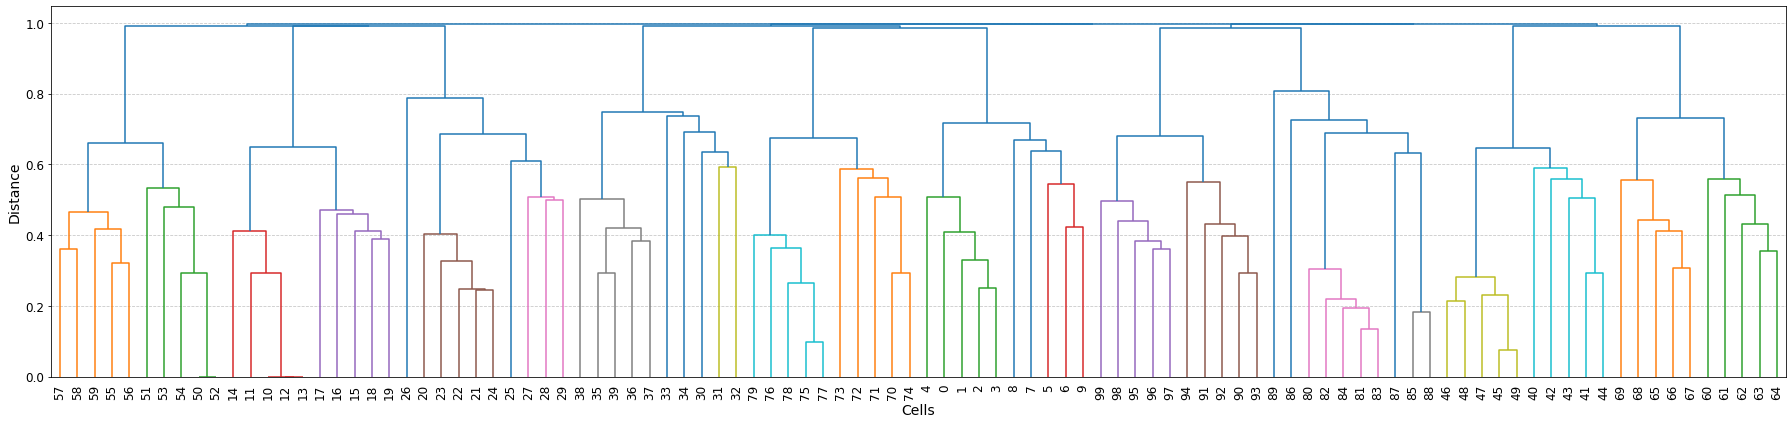

In [44]:
pmat = read_data(data_path)
linkage_matrix = analyze_data(pmat)
plot_tree(linkage_matrix)